In [35]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import random

from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.datasets import load_iris
iris = load_iris()

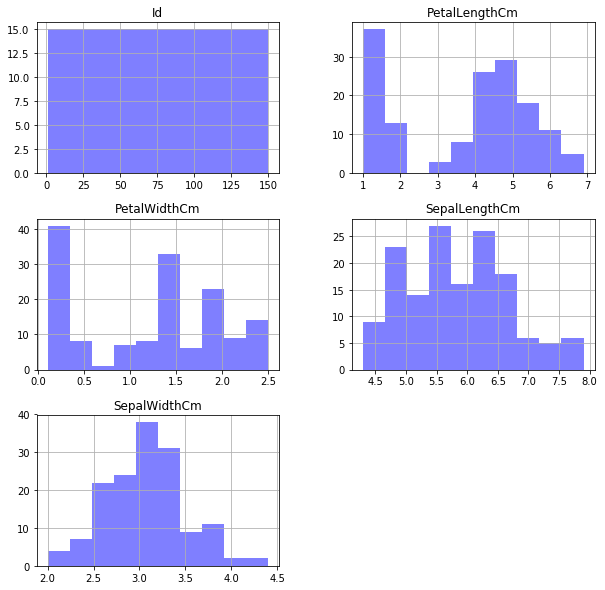

In [36]:
Iris_data= pd.read_csv('F:/DataScience Azure/Iris.csv')
n_samples, n_features = iris.data.shape
Iris_data.hist(alpha=0.5, figsize=(10, 10), color='blue')
plt.show()

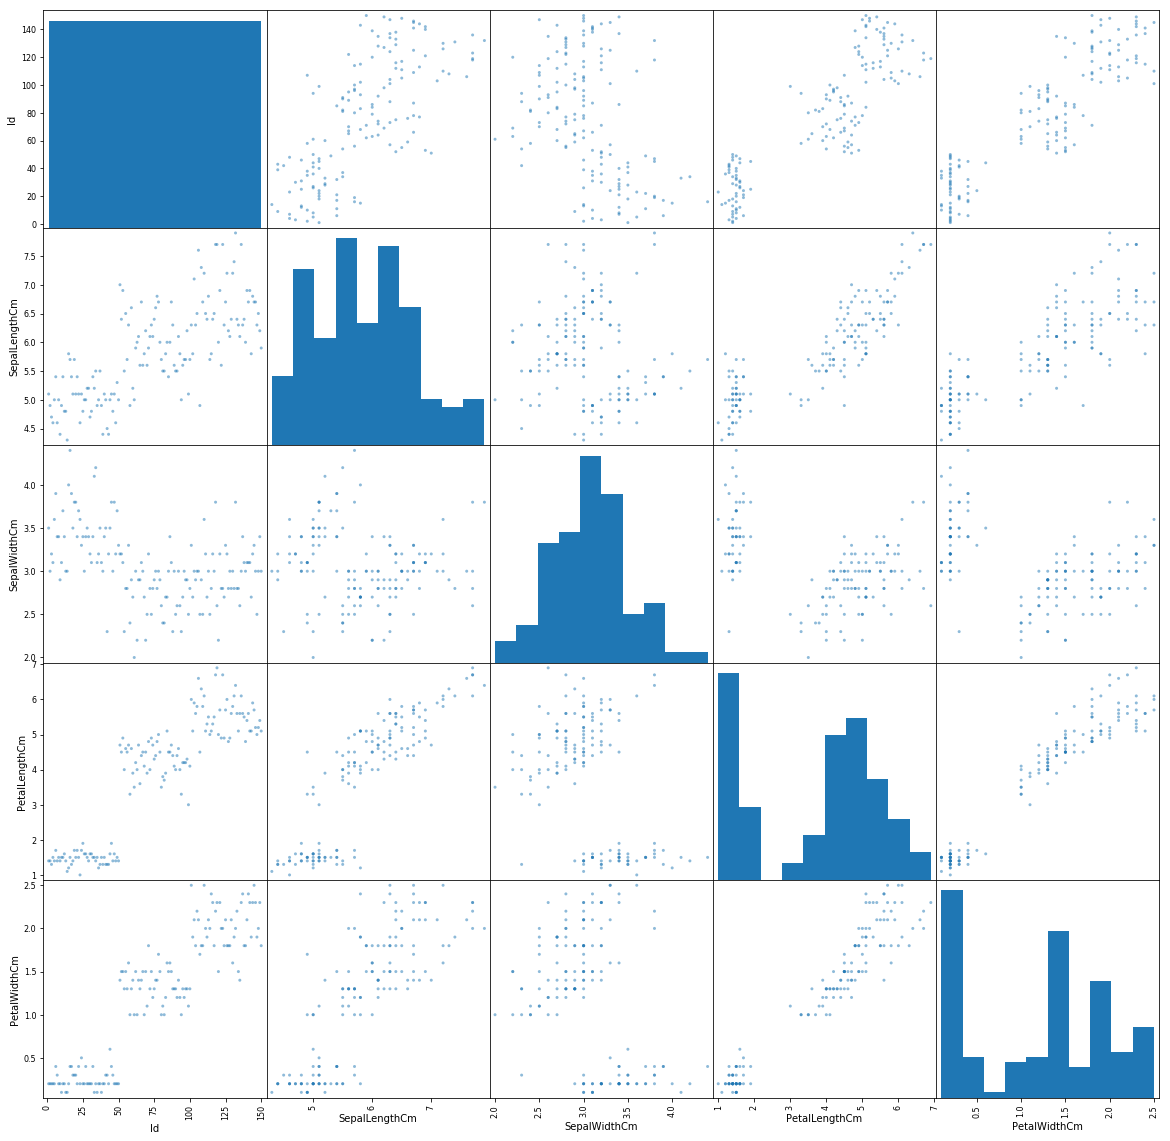

In [37]:
Iris_data= pd.read_csv('F:/DataScience Azure/Iris.csv')
scatter_matrix(Iris_data, alpha=0.5, figsize=(20, 20))
plt.show()

In [39]:
random.seed(123)

def split_data():
    train_A = iris_dataset[0:40]
    test_A = iris_dataset[40:50]
    train_B = iris_dataset[50:90]
    test_B = iris_dataset[90:100]
    train_C= iris_dataset[100:140]
    test_C= iris_dataset[140:150]
    train = np.concatenate(( train_A, train_B ,train_C))
    test =  np.concatenate((test_A,test_B,test_C))
    return train,test

train_percent = 80
test_percent = 20 
iris_dataset = np.column_stack((iris.data,iris.target.T)) 
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)

Finaltrain, Finaltest = split_data()

train_X = np.array([i[:4] for i in Finaltrain])
train_y = np.array([i[4] for i in Finaltrain])
test_X = np.array([i[:4] for i in Finaltest])
test_y = np.array([i[4] for i in Finaltest])

#print(split_data())


Text(0,0.5,'petal width (cm)')

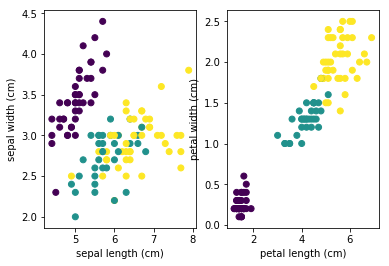

In [40]:
#plotting of train datasets
plt.subplot(1, 2, 1)
plt.scatter(train_X[:,0],train_X[:,1],c=train_y,cmap=cm.viridis)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]) 

#plotting of test datasets
plt.subplot(1, 2, 2)
plt.scatter(train_X[:,2],train_X[:,3],c=train_y,cmap=cm.viridis)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

Text(0,0.5,'petal width (cm)')

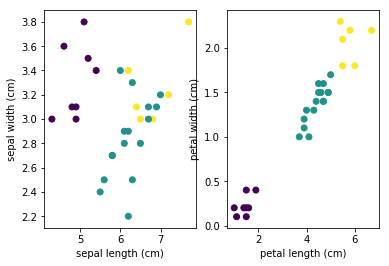

In [41]:
plt.subplot(1, 2, 1)
plt.scatter(test_X[:,0],test_X[:,1],c=test_y,cmap=cm.viridis)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]) 

plt.subplot(1, 2, 2)
plt.scatter(test_X[:,2],test_X[:,3],c=test_y,cmap=cm.viridis)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])



In [45]:
class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    def __init__(self, params=None):     
        if (params == None):
            self.inputLayer = 4                        
            self.hiddenLayer = 5                       
            self.outputLayer = 3                    
            self.learningRate = 0.005                 
            self.max_epochs = 600                    
            self.BiasHiddenValue = -1                  
            self.BiasOutputValue = -1                  
            self.activation = self.a['sigmoid'] 
            self.derivation = self.d['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epochs']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.a[params['ActivationFunction']]
            self.derivation = self.d[params['ActivationFunction']]
        
       
        self.WEIGHT_hidden = self.initialize_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.initialize_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3 
        
    pass
    
    def initialize_weights(self,x,y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]
    a = {'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
        'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
        }
    d = {'sigmoid': (lambda x: x*(1-x)),
          'tanh': (lambda x: 1-x**2),
         'Relu': (lambda x: 1 * (x>0))
        }
 
    def Backpropagation(self, x):
        DELTA_output = []
        
        # Errors in OutputLayer
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.derivation(self.OUTPUT_L2))
        
        # Update weights in OutputLayer and HiddenLayer
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
         # Error in HiddenLayer
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.derivation(self.OUTPUT_L1)
 
        # Update weights in HiddenLayer and InputLayer
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
                
    def epochs_Vs_loss(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("loss");
        plt.title("Epochs Vs Loss")
        plt.show()

    def prediction(self, X, y):
        #Forward Propagation
        predict=[]

        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
                                 
        for i in forward:
             predict.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        print(" Number of Sample  | Class |  Output |  Hoped Output  ")   
        for i in range(len( predict)):
            if( predict[i] == 0): 
                print("id:{}    | Iris-Setosa  |  Output: {}  ".format(i,  predict[i], y[i]))
            elif( predict[i] == 1): 
                print("id:{}    | Iris-Versicolour    |  Output: {}  ".format(i, predict[i], y[i]))
            elif( predict[i] == 2): 
                print("id:{}    | Iris-Virginica   |  Output: {}  ".format(i,  predict[i], y[i]))
                
        return  predict
        pass

    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0]) 
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) 
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) 
                
                square_error = 0
                for i in range(self.OutputLayer):
                    err = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * err))
                    total_error = total_error + square_error
         
                self.Backpropagation(inputs)
                
            total_error = (total_error/n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
             
                
            count_epoch += 1
        self.epochs_Vs_loss(error_array,epoch_array)
        
        plt.plot(W0[0])
        plt.title(' Update Hidden Weights  ')
        plt.legend(['H1','H2','H3','H4','H5'])
        plt.ylabel(' Weight')
        plt.show()
        
        plt.plot(W1[0])
        plt.title('Update Output Weight')
        plt.legend(['O1', 'O2', 'O3'])
        plt.ylabel('Weight')
        plt.show()

        return self

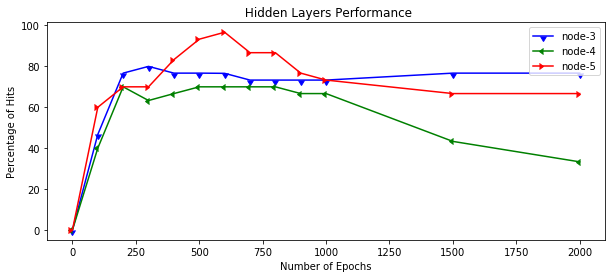

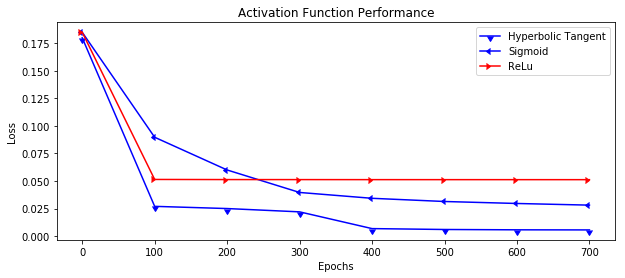

In [46]:
 def test():
    ep1 = [0,100,200,300,400,500,600,700,800,900,1000,1500,2000]
    h_5 = [0,60,70,70,83.3,93.3,96.7,86.7,86.7,76.7,73.3,66.7,66.7]
    h_4 = [0,40,70,63.3,66.7,70,70,70,70,66.7,66.7,43.3,33.3]
    h_3 = [0,46.7,76.7,80,76.7,76.7,76.6,73.3,73.3,73.3,73.3,76.7,76.7]
    plt.figure(figsize=(10,4))
    l1, = plt.plot(ep1, h_3, "m-",color='b',label="node-3", marker=11)
    l2, = plt.plot(ep1, h_4, "m-",color='g',label="node-4", marker=8)
    l3, = plt.plot(ep1, h_5, "m-",color='r',label="node-5", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("Number of Epochs");plt.ylabel("Percentage of Hits");
    plt.title(" Hidden Layers Performance")
    
    ep2 = [0,100,200,300,400,500,600,700]
    sigm = [0.185,0.0897,0.060,0.0396,0.0343,0.0314,0.0296,0.0281]
    tanh = [0.18,0.027,0.025,0.022,0.0068,0.0060,0.0057,0.00561]
    Relu = [0.185,0.05141,0.05130,0.05127,0.05124,0.05123,0.05122,0.05121]
    plt.figure(figsize=(10,4))
    l2 , = plt.plot(ep2, sigm, "m-",color='b',label="Sigmoid", marker=8)
    l1 , = plt.plot(ep2, tanh, "m-",color='b',label="Hyperbolic Tangent",marker=11)
    l3 , = plt.plot(ep2, Relu, "m-",color='r',label="ReLu", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("Epochs");plt.ylabel("Loss");plt.title("Activation Function Performance")
    
test() 


Epoch  1 - Total Error:  0.08936357150024009
Epoch  50 - Total Error:  0.05372528235746763
Epoch  100 - Total Error:  0.03767830046688724
Epoch  150 - Total Error:  0.031150650050135013
Epoch  200 - Total Error:  0.0284007631218753
Epoch  250 - Total Error:  0.026684640459743395
Epoch  300 - Total Error:  0.025230954969119365
Epoch  350 - Total Error:  0.023835334418031522
Epoch  400 - Total Error:  0.022422161169091452
Epoch  450 - Total Error:  0.02096794197543499
Epoch  500 - Total Error:  0.019480678845146756
Epoch  550 - Total Error:  0.017973271213314136
Epoch  600 - Total Error:  0.01642290705903991
Epoch  650 - Total Error:  0.014827759472965853
Epoch  700 - Total Error:  0.013362750473605807


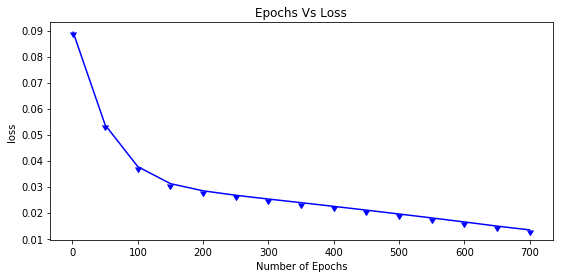

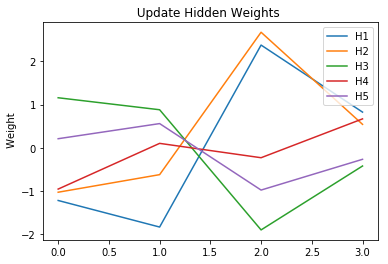

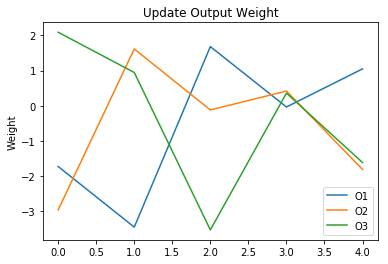

MultiLayerPerceptron(params=None)

In [47]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epochs':700, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

In [49]:
prev = Perceptron.prediction(test_X,test_y)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_set += 1
    elif(test_y[j] == 1): n_vers += 1
    elif(test_y[j] == 2): n_virg += 1
        
for i in range(len(test_y)):
    if test_y[i] == prev[i]: 
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_set += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_vers += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_virg += 1    
         
hits = (hits / len(test_y))*100
faults = 100 - hits

 Number of Sample  | Class |  Output |  Hoped Output  
id:0    | Iris-Setosa  |  Output: 0  
id:1    | Iris-Versicolour    |  Output: 1  
id:2    | Iris-Versicolour    |  Output: 1  
id:3    | Iris-Setosa  |  Output: 0  
id:4    | Iris-Versicolour    |  Output: 1  
id:5    | Iris-Versicolour    |  Output: 1  
id:6    | Iris-Versicolour    |  Output: 1  
id:7    | Iris-Versicolour    |  Output: 1  
id:8    | Iris-Setosa  |  Output: 0  
id:9    | Iris-Virginica   |  Output: 2  
id:10    | Iris-Virginica   |  Output: 2  
id:11    | Iris-Versicolour    |  Output: 1  
id:12    | Iris-Versicolour    |  Output: 1  
id:13    | Iris-Versicolour    |  Output: 1  
id:14    | Iris-Setosa  |  Output: 0  
id:15    | Iris-Virginica   |  Output: 2  
id:16    | Iris-Virginica   |  Output: 2  
id:17    | Iris-Versicolour    |  Output: 1  
id:18    | Iris-Versicolour    |  Output: 1  
id:19    | Iris-Versicolour    |  Output: 1  
id:20    | Iris-Versicolour    |  Output: 1  
id:21    | Iris-Virginica   |

Percents : 96.67 % hits and 3.33 % faults
Total Samples 150
*Iris-Setosa: 8 samples
*Iris-Versicolour: 16 samples
*Iris-Virginica: 6 samples


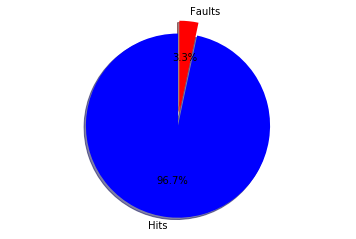

In [50]:
graph_hits = []
print("Percents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total Samples",n_samples)
print("*Iris-Setosa:",n_set,"samples")
print("*Iris-Versicolour:",n_vers,"samples")
print("*Iris-Virginica:",n_virg,"samples")

graph_hits.append(hits)
graph_hits.append(faults)
labels = 'Hits', 'Faults';
sizes = [96.5, 3.3]
explode = (0, 0.14)

fig1, ax1 = plt.subplots();
ax1.pie(graph_hits, explode=explode,colors=['blue','red'],labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Acurracy(Iris-Setosa:) 100.00 %
Acurracy(Iris-Versicolour:) 93.75 %
Acurracy(Iris-Virginica:) 100.00 %


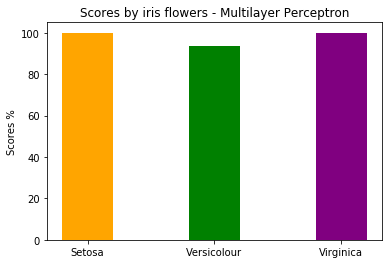

In [51]:
acc_set = (score_set/n_set)*100
acc_vers = (score_vers/n_vers)*100
acc_virg = (score_virg/n_virg)*100
print("Acurracy(Iris-Setosa:)","%.2f"%acc_set, "%")
print("Acurracy(Iris-Versicolour:)","%.2f"%acc_vers, "%")
print("Acurracy(Iris-Virginica:)","%.2f"%acc_virg, "%")
names = ["Setosa","Versicolour","Virginica"]
x1 = [2.0,4.0,6.0]
fig, ax = plt.subplots()
r1 = plt.bar(x1[0], acc_set,color='orange',label='Iris-Setosa')
r2 = plt.bar(x1[1], acc_vers,color='green',label='Iris-Versicolour')
r3 = plt.bar(x1[2], acc_virg,color='purple',label='Iris-Virginica')
plt.ylabel('Scores %')
plt.xticks(x1, names);plt.title('Scores by iris flowers - Multilayer Perceptron')
plt.show()